In [1]:
# 라이브러리 import 

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib


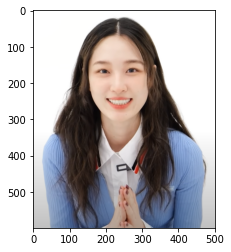

In [2]:
# 이미지 불러오기

image_path = 'camera_sticker/images/2022.png'
img_bgr = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # -> BGR 순서 바꿔주기
img_show = img_bgr.copy() 
plt.imshow(img_rgb) 
plt.show() 

rectangles[[(139, 118) (324, 304)]]


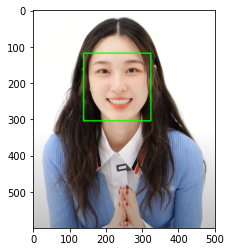

In [3]:
# Face Bounding Box

detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)  # dlib 은 rgb 이미지를 input으로 받는다. 
print(dlib_rects)
# dlib.rectangles -> 왼쪽 위, 오른쪽 아래 꼭짓점의 좌표로 직사각형을 표현함

for dlib_rect in dlib_rects: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [4]:
#랜드마크 

model_path = 'camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
# landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
# dlib.rectangle: 내부를 예측하는 박스
# dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        # (x,y) 튜플 68개 리스트
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    

68


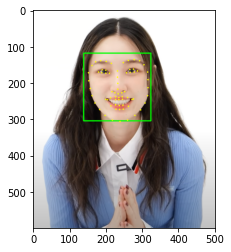

In [5]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # -1 : 내부가 채워진 원

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
#스티커 붙이기

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30], landmark[33]) # 코의 index
    x = landmark[30][0] # 코 부위의 x값
    y = (landmark[33][1] +landmark[30][0]) //2 # 코 중간, 코 끝 y값의 중간 
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

sticker_path = 'camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w//3,h//3)) 
print (img_sticker.shape) 

(233, 217) (234, 230)
(x,y) : (233,231)
(w,h) : (186,186)
(62, 62, 3)


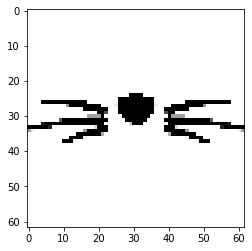

In [7]:
plt.imshow(img_sticker)

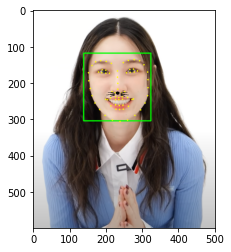

In [8]:
sticker_area = img_show[y-img_sticker.shape[0]//2:y+img_sticker.shape[0]//2, x-img_sticker.shape[1]//2:x+img_sticker.shape[1]//2]
img_show[y-img_sticker.shape[0]//2:y+img_sticker.shape[0]//2, x-img_sticker.shape[1]//2:x+img_sticker.shape[1]//2] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 투명하게 적용이 안되고 있다..

sticker_area 랑 img_sticker 위치 변경 , img_show 새로고침 

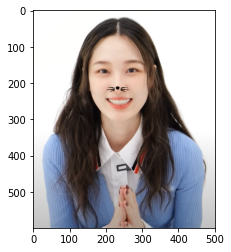

In [9]:
# y값만 살짝 바꿔보자..
y = landmark[30][1] 
img_show2 = img_bgr.copy() 

sticker_area = img_show2[y-img_sticker.shape[0]//2:y+img_sticker.shape[0]//2, x-img_sticker.shape[1]//2:x+img_sticker.shape[1]//2]
img_show2[y-img_sticker.shape[0]//2:y+img_sticker.shape[0]//2, x-img_sticker.shape[1]//2:x+img_sticker.shape[1]//2] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

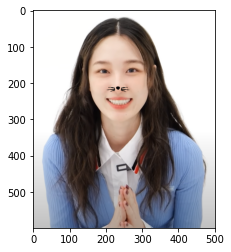

In [12]:
## fine tuning ㅋㅋㅋ
x = landmark[30][0] + 1
y = landmark[30][1]
img_show4 = img_bgr.copy() 

sticker_area = img_show4[y-img_sticker.shape[0]//2:y+img_sticker.shape[0]//2, x-img_sticker.shape[1]//2:x+img_sticker.shape[1]//2]
img_show4[y-img_sticker.shape[0]//2:y+img_sticker.shape[0]//2, x-img_sticker.shape[1]//2:x+img_sticker.shape[1]//2] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show4, cv2.COLOR_BGR2RGB))
plt.show()

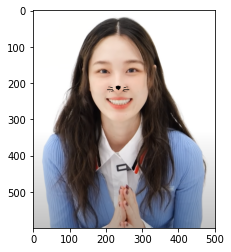

In [16]:
x = landmark[30][0] + 1
y = landmark[30][1]
img_show5 = img_bgr.copy() 
w = h = dlib_rect.width()
img_sticker = cv2.resize(img_sticker, (w//2,h//2)) 


sticker_area = img_show5[y-img_sticker.shape[0]//2:y+img_sticker.shape[0]//2 +1, x-img_sticker.shape[1]//2:x+img_sticker.shape[1]//2 +1]
img_show5[y-img_sticker.shape[0]//2:y+img_sticker.shape[0]//2 +1, x-img_sticker.shape[1]//2:x+img_sticker.shape[1]//2 +1] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show5, cv2.COLOR_BGR2RGB))
plt.show()

옆모습

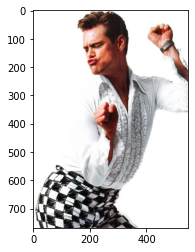

In [30]:
image_path2 = 'camera_sticker/images/pngwing.com.png'
img_bgr2 = cv2.imread(image_path2)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
img_show2 = img_bgr2.copy()

plt.imshow(img_rgb2)
plt.show()

rectangles[[(139, 82) (268, 211)]]


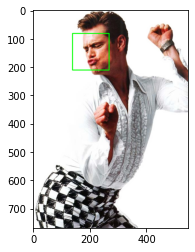

In [31]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects2 = detector_hog(img_rgb2, 1)  # dlib 은 rgb 이미지를 input으로 받는다. 
print(dlib_rects2)
# dlib.rectangles -> 왼쪽 위, 오른쪽 아래 꼭짓점의 좌표로 직사각형을 표현함

for dlib_rect in dlib_rects2: 
    l = dlib_rect.left() 
    t = dlib_rect.top() 
    r = dlib_rect.right() 
    b = dlib_rect.bottom() 

cv2.rectangle(img_show2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
img_show_rgb2 =  cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

In [32]:
list_landmarks2 = []

for dlib_rect in dlib_rects2:
    points2 = landmark_predictor(img_rgb2, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points2 = list(map(lambda p: (p.x, p.y), points2.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        # (x,y) 튜플 68개 리스트
    list_landmarks2.append(list_points2)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks2[0]))
    

68


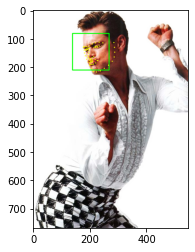

In [33]:
for landmark in list_landmarks2:
    for point in landmark:
        cv2.circle(img_show2, point, 2, (0, 255, 255), -1) # -1 : 내부가 채워진 원

img_show_rgb2 = cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

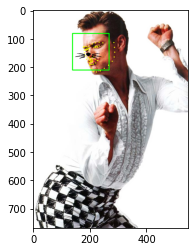

In [35]:
x = landmark[30][0] + 1
y = landmark[30][1]

sticker_area = img_show2[y-img_sticker.shape[0]//2:y+img_sticker.shape[0]//2 +1, x-img_sticker.shape[1]//2:x+img_sticker.shape[1]//2 + 1]
img_show2[y-img_sticker.shape[0]//2:y+img_sticker.shape[0]//2 + 1, x-img_sticker.shape[1]//2:x+img_sticker.shape[1]//2 + 1] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

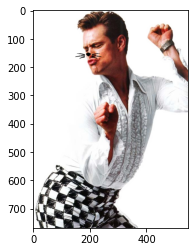

In [36]:
sticker_area = img_bgr2[y-img_sticker.shape[0]//2:y+img_sticker.shape[0]//2 +1, x-img_sticker.shape[1]//2:x+img_sticker.shape[1]//2 + 1]
img_bgr2[y-img_sticker.shape[0]//2:y+img_sticker.shape[0]//2 + 1, x-img_sticker.shape[1]//2:x+img_sticker.shape[1]//2 + 1] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB))
plt.show()

1.얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
 - 자연스러운 합성이 되려면, 얼굴이 회전한 정도에 맞춰서 필터가 같이 돌아가주면 좋을 것 같다.

2.멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
 - 오늘 구현한 코드 자체가 얼굴 인식을 먼저하고, 그 결과를 기반으로 작동하기 때문에, 얼굴 인식 부분 (detector, landmark) 과정에서 문제가 발생할 수 있는 경우에 작동이 안될 것 같다.
 
3.실행 속도가 중요할까요?
 - 다양한 필터 기능을 가진 어플을 사람들이 사용하게 하려면, 적용 속도가 실시간에 가깝게 빨라야 할 것이다.

4.스티커앱을 만들 때 정확도가 얼마나 중요할까요?
 - 실행 속도보다 더 중요할 것이다. 사람들이 답답해 하기도 전에 바보같은 어플이라는 평가를 받게 되면 ... 유저들이 모두 이탈하지 않을까?

### 회고

변수 설정이 많아지니까 여러번 돌리는 과정에서 에러가 빈번히 일어났다. 
중복되어 실행되면서 발생하는 변수를 제어하기 위해서 어떻게 해야할 지 고민하는 시간을 가졌다.
여러 사진에 대해 많은 테스트를 하기엔 시간이 부족해서 아쉬웠다. 모르는 라이브러리를 써서 프로젝트를 할 땐 항상 새로운 api를 먼저 공부하고 진행해야하는 게 고난이다.. 그래도 재밌는 프로젝트였다.
